In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from slipgen import run_slipgen

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [19]:
cat slipgen.in

11	8		! length and width of the fault
256	256		! discretization in strike and dip direction
1.			! K-value
2	2		! Description of slip of the deterministic part
0.54    0.18		! (2x2 blocks with mean slip on them)
0.18    0.18

Athens: 11x8km fault



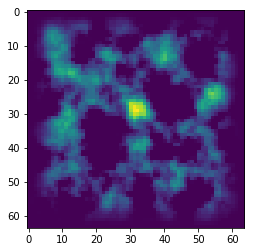

In [4]:
length, width = 11, 8
ln, wn = 64, 64
k = 2.
mean_slip = np.array(
    (
        (0.54, 0.18),
        (0.18, 0.18)
    )
)
#mean_slip = np.random.rand(4, 4)

X, Y, Z = run_slipgen(length, width, ln, wn, k, mean_slip)

plt.figure()
plt.imshow(Z)

In [108]:
data = [
    go.Surface(
        x=X,
        y=Y,
        z=Z
    )
]
layout = go.Layout(
    width=500,
    height=500,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)